<a href="https://colab.research.google.com/github/Muhsiinn/Malaria-Cell-Image-Classification-with-CNN/blob/main/Malaria_cell_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
# Create the .kaggle folder and move the file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle CLI
!pip install -q kaggle

# Download the malaria dataset from Kaggle
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 96% 650M/675M [00:05<00:00, 182MB/s]
100% 675M/675M [00:06<00:00, 118MB/s]


In [3]:
!unzip -q cell-images-for-detecting-malaria.zip
!ls cell_images


cell_images  Parasitized  Uninfected


In [4]:
import os
import cv2
import matplotlib.pyplot as plt


In [5]:
base_path = "cell_images"

parasitized_path = os.path.join(base_path, "Parasitized")
uninfected_path = os.path.join(base_path, "Uninfected")

In [6]:
para_images = os.listdir(parasitized_path)
un_images = os.listdir(uninfected_path)

In [7]:
img_parasite = cv2.imread(os.path.join(parasitized_path,para_images[0]))
img_uninfected = cv2.imread(os.path.join(uninfected_path,un_images[0]))


In [8]:
img_parasite = cv2.cvtColor(img_parasite, cv2.COLOR_BGR2RGB)
img_uninfected = cv2.cvtColor(img_uninfected, cv2.COLOR_BGR2RGB)

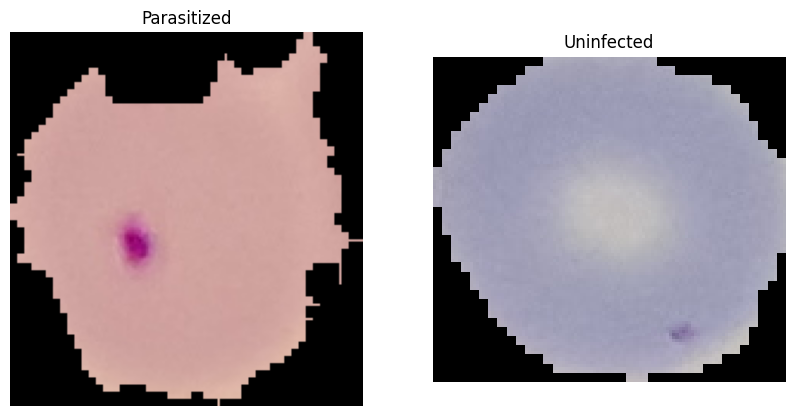

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_parasite)
plt.title("Parasitized")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_uninfected)
plt.title("Uninfected")
plt.axis("off")

plt.show()


In [10]:


print(img_parasite.shape)
# (130, 130, 3)

print(img_parasite[0][0])
# [153, 204, 255] ← one pixel (BGR before you convert)


(157, 148, 3)
[0 0 0]


In [11]:
data = []

for i in range (len(para_images)):
  img_para_path = os.path.join(parasitized_path,para_images[i])
  img_uni_path = os.path.join(uninfected_path,un_images[i])

  img_para = cv2.imread(img_para_path)
  img_uni = cv2.imread(img_uni_path)

  # Check if images are loaded successfully
  if img_para is not None and img_uni is not None:
    img_para = cv2.cvtColor(img_para, cv2.COLOR_BGR2RGB)
    img_uni = cv2.cvtColor(img_uni, cv2.COLOR_BGR2RGB)
    img_para = cv2.resize(img_para, (64, 64))
    img_uni = cv2.resize(img_uni, (64, 64))
    data.append((img_para,1))
    data.append((img_uni,0))
  else:
    if img_para is None:
      print(f"Warning: Could not load image: {img_para_path}. Skipping.")
    if img_uni is None:
      print(f"Warning: Could not load image: {img_uni_path}. Skipping.")

In [12]:
X = []
Y = []
for features,labels in data:
  X.append(features)
  Y.append(labels)

In [13]:
import numpy as np

X = np.array(X)
Y = np.array(Y)


In [14]:
print(X.shape)
print(Y.shape)


(27556, 64, 64, 3)
(27556,)


In [15]:
X = X /255

In [16]:
import tensorflow as tf

from tensorflow.keras import layers,models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.add(layers.Flatten())
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.add(layers.Dense(64,activation = 'relu'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,312 (395.75 KB)

 Trainable params: 101,312 (395.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [28]:
history = model.fit(X,Y,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9552 - loss: 0.1289 - val_accuracy: 0.9474 - val_loss: 0.1675
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9543 - loss: 0.1328 - val_accuracy: 0.9467 - val_loss: 0.1763
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9552 - loss: 0.1283 - val_accuracy: 0.9370 - val_loss: 0.1894
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9575 - loss: 0.1244 - val_accuracy: 0.9470 - val_loss: 0.1810
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9606 - loss: 0.1149 - val_accuracy: 0.9394 - val_loss: 0.1923
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9664 - loss: 0.1008 - val_accuracy: 0.9434 - val_loss: 0.1860
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9657 - loss: 0.1023 - val_accuracy: 0.9463 - val_loss: 0.1793
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9643 - loss: 0.0998 - val_accuracy: 0.

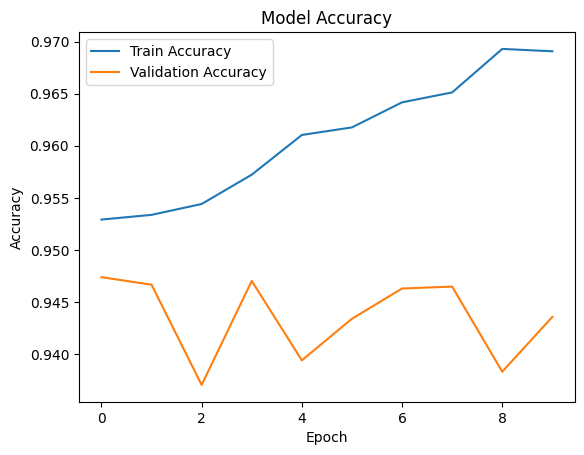

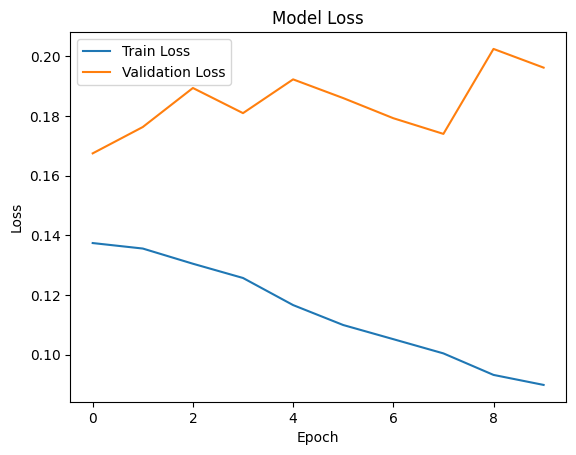

In [30]:




# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


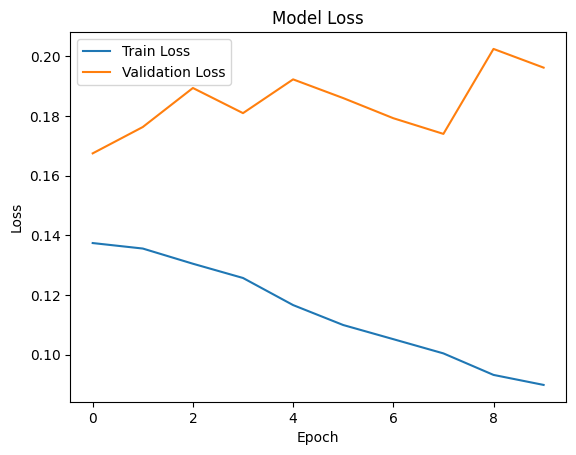

In [31]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
model.save("malaria_model_cnn.keras")


In [34]:
test_img = cv2.imread("cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (64, 64))
test_img = test_img / 255.0
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)
print(prediction)
print("Probability of infection:", prediction[0][0])
if prediction[0][0] > 0.5:
    print("🦠 Infected (Parasitized)")
else:
    print("✅ Uninfected (Healthy)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
[[0.9999988]]
Probability of infection: 0.9999988
🦠 Infected (Parasitized)
